Hello Christopher!

My name is Dmitry.  I'm glad to review your work today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

### The goal of my analysis is to analyze client's behavior and determine which prepaid plan brings in more revenue for the company. 

## Initialization

### Importing Libraries 

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st


## Load data

### Loading Dataframes 

In [2]:
# Load the data files into different DataFrames
# megaline_calls = pd.read_csv('chapter_3_csvs\megaline_calls.csv')
# megaline_internet = pd.read_csv('chapter_3_csvs\megaline_internet.csv')
# megaline_messages = pd.read_csv('chapter_3_csvs\megaline_messages.csv')
# megaline_plans = pd.read_csv('chapter_3_csvs\megaline_plans.csv')
# megaline_users = pd.read_csv('chapter_3_csvs\megaline_users.csv')

# fix by reviewer
megaline_calls = pd.read_csv('/datasets/megaline_calls.csv')
megaline_internet = pd.read_csv('/datasets/megaline_internet.csv')
megaline_messages = pd.read_csv('/datasets/megaline_messages.csv')
megaline_plans = pd.read_csv('/datasets/megaline_plans.csv')
megaline_users = pd.read_csv('/datasets/megaline_users.csv')

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Be careful with datasets paths! It's a good practice to use try-except construction.
</div>

<div class="alert alert-block alert-info">
<b>Can you explain more about the issues that can arise from doing what I did? I know how to use the try-except but I'm curious about the why.<b> <a class="tocSkip"></a>

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Ok. Reviewers often do not have local files and we use virtual machines in remote servers. Thus we need paths like "/datasets" =)
</div>

### Megaline Calls Dataframe

In [3]:
megaline_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
megaline_calls.info()

### The call_date needs to be converted from a string to a datetime. 
### The float of the duration needs to be converted to an integer and rounded up since the company
### rounds seconds up to minutes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


#### Converting duration of calls to ints and rounding them up using np.ceil.

In [5]:
megaline_calls['duration'] = megaline_calls['duration'].apply(np.ceil)
megaline_calls['duration'] = megaline_calls['duration'].astype('int')
megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         137735 non-null  object
 1   user_id    137735 non-null  int64 
 2   call_date  137735 non-null  object
 3   duration   137735 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.2+ MB


#### Call_date needed to be converted into a datetime and the duration needs to be converted to an integer that rounds up. 

#### Converting call_date from string to datetime. 

In [6]:
megaline_calls['call_date'] = megaline_calls['call_date'].astype('datetime64[ns]')
megaline_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


### Megaline Internet Dataframe

In [7]:
megaline_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [8]:
megaline_internet.info()
### Need to convert session_date to a datetime instead of a string. 
### The total amount of megabytes used for the month needs to be rounded up to gigabytes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [9]:
megaline_internet['session_date'] = megaline_internet['session_date'].astype('datetime64[ns]')
megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Megaline Messages Dataframe

In [10]:
megaline_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


megaline_messages.info()


#### Need to convert message date to datetime.

In [11]:
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'])
megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


#### Datetime needs to be converted from a string to datetime so that we can use the dates.

### Megaline Plans Dataframe

In [12]:
megaline_plans
### This dataframe is great the way it is.

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [13]:
megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


#### Megaline Users Dataframe

In [14]:
megaline_users.head()
ultimate_users = megaline_users[megaline_users['plan'] == 'ultimate']
ultimate_users
surf_users = megaline_users[megaline_users['plan'] == 'surf']

In [15]:
megaline_users.info()
### Convert reg_date into datetime and convert churn date into a datetime. 
### Convert churn_date into datetime but keep Nulls. The nulls mean that the clients are still with the company.
### Since there are only 34 nulls that means that only 34 people have stopped the service to this date. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


#### Converting reg_date and churn_date to datetime datetypes.

In [16]:
megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'])
megaline_users['churn_date'] = pd.to_datetime(megaline_users['churn_date'], errors = 'coerce')
megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good initial review. However, it's a good practice to check for duplicates also.
</div>

#### Needed to convert both reg_date and churn_date to datetime types to be able to work with the dates. 

#### Showing the current users to total users ratio for the company.

In [17]:
current_users = len(megaline_users[megaline_users['churn_date'].isnull()])
print(f"The current amount of users is {current_users} users out of 500 total users.")

The current amount of users is 466 users out of 500 total users.


#### The null data should be left alone because it gives us a total amount of users who have cancelled their membership, which is important information for the company. That information could give us clues into why the users cancelled those memberships and help to improve our company with the retention of customers

#### Making a state column so that we can access states quickly.

In [18]:
states = megaline_users['city'].str.rsplit(', ')
megaline_users['state'] = states.apply(lambda x: x[1])
megaline_users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,GA MSA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,WA MSA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NV MSA
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,OK MSA
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,WA MSA


#### Created a State column so that we can easily access information for the different states in the data.

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [19]:
# Print out the plan conditions and make sure they are clear for you
megaline_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

#### Calculated Number of Calls made by each user per month.

In [20]:
# Calculate the number of calls made by each user per month. Save the result.
megaline_calls.head()
megaline_calls['month'] = megaline_calls['call_date'].dt.month
num_calls_made = megaline_calls.groupby(['user_id', 'month'])['id'].count().reset_index()
num_calls_made.rename(columns={"user_id": "user_id", "id": "num_calls_made"}, inplace=True)
num_calls_made.head(20)




,user_id,month,num_calls_made
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
5,1001,12,56
6,1002,10,11
7,1002,11,55
8,1002,12,47
9,1003,12,149


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct.
</div>

#### Calculated the number of calls made each month per month by user_id. 

In [21]:
# Calculate the amount of minutes spent by each user per month. Save the result.
megaline_calls.head()
megaline_calls['month'] = megaline_calls['call_date'].dt.month
minutes_per_month = megaline_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
minutes_per_month.rename(columns={'duration': 'minutes_per_month'}, inplace=True)
minutes_per_month['minutes_per_month'].apply(np.ceil)
minutes_per_month


,user_id,month,minutes_per_month
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Let's talk about the project's requirements. 
    
Remember! Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.
    
    
So, to calculate amount of minutes spent we need to preprocess duration column based on description.
</div>

<div class="alert alert-block alert-info">
<b>Didn't this line of code convert the integers and round them up like it was asking? Also, I rounded the gigabytes up for the total months at 1.4.0.4.</b> Can you explain where this is not correct?
megaline_calls['duration'] = megaline_calls['duration'].apply(np.ceil)
megaline_calls['duration'] = megaline_calls['duration'].astype('int')
megaline_calls.info()<a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Line in comment is correct =) Did not find it in code...
</div>

<div class="alert alert-block alert-info">
<b>The code is up at 1.2.2.1 <b> <a class="tocSkip"></a>

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Ok, correct.
</div>

#### Calculated amount of minutes spent per user each month.

In [22]:
# Calculate the number of messages sent by each user per month. Save the result.
megaline_messages['month'] = megaline_messages['message_date'].dt.month
msg_sent_user = megaline_messages.groupby(['user_id', 'month'])['id'].count().reset_index()
msg_sent_user.rename(columns={'id': 'num_messages'}, inplace=True)
msg_sent_user



,user_id,month,num_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct.
</div>

#### Calculated amount of messages sent per user each month by user_id.

In [23]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
megaline_internet['month'] = megaline_internet['session_date'].dt.month
mb_used_per_month = megaline_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
mb_used_per_month
print(mb_used_per_month.head())
mb_used_per_month['mb_used'] = (mb_used_per_month['mb_used']/1024).apply(np.ceil)
mb_used_per_month['gb_used'] = mb_used_per_month['mb_used'].astype(int)
mb_used_per_month.drop('mb_used', axis=1, inplace=True)
mb_gb_used_per_month = mb_used_per_month
mb_gb_used_per_month


   user_id  month   mb_used
0     1000     12   1901.47
1     1001      8   6919.15
2     1001      9  13314.82
3     1001     10  22330.49
4     1001     11  18504.30


,user_id,month,gb_used
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19
...,...,...,...
2272,1498,12,23
2273,1499,9,13
2274,1499,10,20
2275,1499,11,17


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Seems we have redundant actions here.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

We have 1024 Mb in 1 Gb.
</div>

<div class="alert alert-block alert-info">
<b>Oh, it's in binary. That makes sense. If you do a search it's 1000 MB to 1 GB. But MB binary is 1024 MB to 1 GB. Okay I'll fix this.<a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Pro tip: we can apply np.ceil column-wise - np.ceil(df[column]). It's more efficient than row-wise.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

#### Calculated amount of GB's used by each customer per month.

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [24]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
mb_gb_used_per_month

 
num_call_min_month = pd.merge(num_calls_made, minutes_per_month, on=['user_id', 'month'], how='outer')
call_msg_minute = pd.merge(num_call_min_month, msg_sent_user, on=['user_id', 'month'], how='outer')
merge_df = pd.merge(call_msg_minute, mb_gb_used_per_month, on=['user_id', 'month'], how='outer')
merged_df = pd.merge(merge_df, megaline_users, on=['user_id'], how='outer')

merged_df.head(50)





,user_id,month,num_calls_made,minutes_per_month,num_messages,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,state
0,1000,12.0,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,GA MSA
1,1001,8.0,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,WA MSA
2,1001,9.0,49.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,WA MSA
3,1001,10.0,65.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,WA MSA
4,1001,11.0,64.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,WA MSA
5,1001,12.0,56.0,412.0,44.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,WA MSA
6,1002,10.0,11.0,59.0,15.0,7.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NV MSA
7,1002,11.0,55.0,386.0,32.0,19.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NV MSA
8,1002,12.0,47.0,384.0,41.0,15.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NV MSA
9,1003,12.0,149.0,1104.0,50.0,27.0,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,OK MSA


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Let's take a look at what happened.
    
We need to join (merge) tables by user_id and month. Also, we need to choose appropriate join strategy (left, inner, right, outer). Do not forget that we can have persons, who do not use sms, for example, but use internet.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Pro tip: do not forget to check table after join. We need to save all clients in table.
</div>

<div class="alert alert-block alert-info">
<b>I'm pretty sure I figured it out and that this is correct! :).<a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Yep, you are right! Now join is correct.
    
Pro tip: it's a good practice to check shape of resulting df + check number of unique users to avoid duplicates.
</div>

#### Merged the dataframes together so that we can see the minutes per customer, gb's per customer, and messages sent per customer in one dataframe and compare the data. 

In [25]:
# Add the plan information
megaline_plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [26]:
# Calculate the monthly revenue for each user
def minute_revenue_surf(minutes): #num_messages, gb_used):
    total = megaline_plans['usd_monthly_pay'][0]
    
    if minutes > megaline_plans['minutes_included'][0]:
        over_minutes = minutes - (megaline_plans['minutes_included'][0])
        total += over_minutes * (megaline_plans['usd_per_minute'][0])
    return total

def message_revenue_surf(num_messages):
    total = 0
    if num_messages > megaline_plans['messages_included'][0]:
        over_messages = num_messages - (megaline_plans['messages_included'][0])
        total += over_messages * (megaline_plans['usd_per_message'][0])
    return total

def gb_revenue_surf(gb_used):
    total = 0
    if gb_used > 15:
        over_gb = gb_used - (15)
        total += over_gb * (megaline_plans['usd_per_gb'][0])
    return total
    
    

def minute_revenue_ultimate(minutes):
    total = megaline_plans['usd_monthly_pay'][1]
    
    if minutes > megaline_plans['minutes_included'][1]:
        over_minutes = minutes - (megaline_plans['minutes_included'][1])
        total += over_minutes * (megaline_plans['usd_per_minute'][1])
    return total

def message_revenue_ultimate(num_messages):
    total = 0
    if num_messages > megaline_plans['messages_included'][1]:
        over_messages = num_messages - (megaline_plans['messages_included'][1])
        total += over_messages * (megaline_plans['usd_per_message'][1])
    return total

def gb_revenue_ultimate(gb_used):
    total = 0
    if gb_used > 30:
        over_gb = gb_used - (30)
        total += over_gb * (megaline_plans['usd_per_gb'][1])
    return total


merged_df['minute_revenue_surf'] = merged_df['minutes_per_month'].apply(minute_revenue_surf)
merged_df['message_revenue_surf'] = merged_df['num_messages'].apply(message_revenue_surf)
merged_df['gb_revenue_surf'] = merged_df['gb_used'].apply(gb_revenue_surf)
merged_df['total_revenue_surf'] = merged_df['minute_revenue_surf'] + merged_df['message_revenue_surf'] + merged_df['gb_revenue_surf']

merged_df['minute_revenue_ultimate'] = merged_df['minutes_per_month'].apply(minute_revenue_ultimate)
merged_df['message_revenue_ultimate'] = merged_df['num_messages'].apply(message_revenue_ultimate)
merged_df['gb_revenue_ultimate'] = merged_df['gb_used'].apply(gb_revenue_ultimate)
merged_df['total_revenue_ultimate'] = merged_df['minute_revenue_ultimate'] + merged_df['message_revenue_ultimate'] + merged_df['gb_revenue_ultimate']

new_df = merged_df.drop(['minute_revenue_surf', 'message_revenue_surf', 'gb_revenue_surf', 'minute_revenue_ultimate', 'message_revenue_ultimate', 'gb_revenue_ultimate'], axis=1)

new_df.merge(megaline_users)
df_updated = new_df.drop(['first_name', 'last_name', 'age', 'churn_date'], axis=1)
df_updated.head()


    


,user_id,month,num_calls_made,minutes_per_month,num_messages,gb_used,city,reg_date,plan,state,total_revenue_surf,total_revenue_ultimate
0,1000,12.0,16.0,124.0,11.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,GA MSA,20.00,70.0
1,1001,8.0,27.0,182.0,30.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,WA MSA,20.00,70.0
2,1001,9.0,49.0,315.0,44.0,14.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,WA MSA,20.00,70.0
3,1001,10.0,65.0,393.0,53.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,WA MSA,90.09,70.0
4,1001,11.0,64.0,426.0,36.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,WA MSA,60.00,70.0


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

It's not a good practice to hardcode some values... 15 and 30 Gb we have in megaline_plans in column mb_per_month_included.
</div>

<div class="alert alert-block alert-info">
I'm confused about what you mean? Can you give more information?<a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

We can change hardcode values to values from megaline_plans df.
    
I mean this functions:
</div>

In [27]:
# reviewer's example

def gb_revenue_surf(gb_used):
    total = 0
    if gb_used > 15: # This line
        over_gb = gb_used - (15) # This line
        total += over_gb * (megaline_plans['usd_per_gb'][0])
    return total

def gb_revenue_ultimate(gb_used):
    total = 0
    if gb_used > 30: # This line
        over_gb = gb_used - (30) # This line
        total += over_gb * (megaline_plans['usd_per_gb'][1])
    return total

#### Created two columns in the dataframe that give the total revenue if the client has the surf plan and a total revenue if the client has the ultimate plan. This can help the company to compare the amount they would make if every client had one plan or the other.

In [28]:
ultimate_revenue_df = df_updated[df_updated['plan'] == 'ultimate']
ultimate_revenue_df = ultimate_revenue_df.drop(['total_revenue_surf', 'city'], axis=1)
ultimate_revenue_df.head()

,user_id,month,num_calls_made,minutes_per_month,num_messages,gb_used,reg_date,plan,state,total_revenue_ultimate
0,1000,12.0,16.0,124.0,11.0,2.0,2018-12-24,ultimate,GA MSA,70.0
19,1006,11.0,2.0,10.0,15.0,3.0,2018-11-27,ultimate,CA MSA,70.0
20,1006,12.0,9.0,59.0,139.0,32.0,2018-11-27,ultimate,CA MSA,84.0
26,1008,10.0,71.0,476.0,21.0,17.0,2018-08-03,ultimate,FL MSA,70.0
27,1008,11.0,63.0,446.0,37.0,24.0,2018-08-03,ultimate,FL MSA,70.0


#### Created a dataframe exclusively for the ultimate revenue and dropped the surf revenue.

In [29]:
surf_revenue_df = df_updated[df_updated['plan'] == 'surf']
surf_revenue_df = surf_revenue_df.drop(['total_revenue_ultimate', 'city'], axis=1)
surf_revenue_df.head()

,user_id,month,num_calls_made,minutes_per_month,num_messages,gb_used,reg_date,plan,state,total_revenue_surf
1,1001,8.0,27.0,182.0,30.0,7.0,2018-08-13,surf,WA MSA,20.00
2,1001,9.0,49.0,315.0,44.0,14.0,2018-08-13,surf,WA MSA,20.00
3,1001,10.0,65.0,393.0,53.0,22.0,2018-08-13,surf,WA MSA,90.09
4,1001,11.0,64.0,426.0,36.0,19.0,2018-08-13,surf,WA MSA,60.00
5,1001,12.0,56.0,412.0,44.0,19.0,2018-08-13,surf,WA MSA,60.00


#### Created a dataframe exclusively for the surf revenue and dropped the ultimate revenue. With these two dataframes we can now start to answer questions about the comparisons between the two. 

In [30]:
# First Attempt
# class SurfPlan:
#     def __init__(self, minutes, num_messages, gb_used):
#         self.minutes = minutes
#         self.num_messages = num_messages
#         self.gb_used = gb_used
#         self.total = 20
    
#     def minute_total(self):
#         if self.minutes > 500:
#             over_minute = self.minutes - 500
#             self.total += over_minute * 0.03
    
#     def num_txt_messages(self):
#         if self.num_messages > 50:
#             over_message = self.num_messages - 50
#             self.total += over_message * 0.03
    
#     def gb_data_used(self):
#         if self.gb_used > 15:
#             gb_exceeded = self.gb_used - 15
#             self.total += gb_exceeded * 10
        
   
# class UltimatePlan:
#     def __init__(self, minutes, num_messages, gb_used):
#         self.minutes = minutes
#         self.num_messages = num_messages
#         self.gb_used = gb_used
#         self.total = 70
        
#     def minute_total(self):
#         if self.minutes > 3000:
#             over_minute = self.minutes - 3000
#             self.total += over_minute * 0.01
    
#     def num_txt_messages(self):
#         if self.num_messages > 1000:
#             over_message = self.num_messages - 1000
#             self.total += over_message * 0.01
    
#     def gb_data_used(self):
#         if self.gb_used > 30:
#             gb_exceeded = self.gb_used - 30
#             self.total += gb_exceeded * 7

# test_study = UltimatePlan(600, 150, 50)
# test_study.total()

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

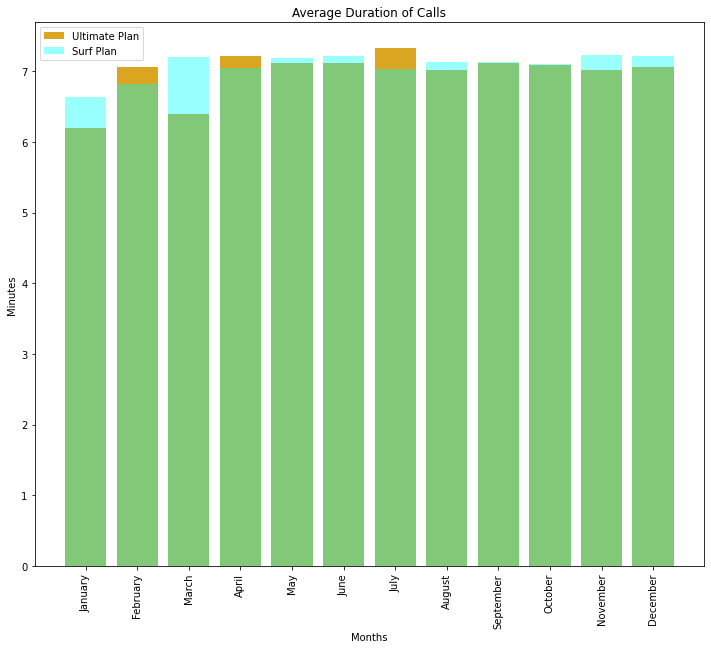

In [31]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
ultimate_revenue_df['average_duration'] = ultimate_revenue_df['minutes_per_month']/ultimate_revenue_df['num_calls_made']
surf_revenue_df['average_duration'] = surf_revenue_df['minutes_per_month']/surf_revenue_df['num_calls_made']
duration_ultimate_calls = ultimate_revenue_df.groupby('month')['average_duration'].mean()
duration_surf_calls = surf_revenue_df.groupby('month')['average_duration'].mean()
plt.figure(figsize=(12, 10))
plt.bar(range(1, 13), duration_ultimate_calls, color='goldenrod')
plt.bar(range(1, 13), duration_surf_calls, color='aqua', alpha = 0.4)
plt.title('Average Duration of Calls')
plt.xlabel('Months')
plt.ylabel('Minutes')
plt.xticks(range(1,13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation='vertical')
plt.legend(['Ultimate Plan', 'Surf Plan'])
plt.show()



#### Graphed the differences between the average durations of calls per month between the two plans. We can see that there are some distinct differences, like in January, but on average they are extremely closely related in duration of calls between the two plans. 

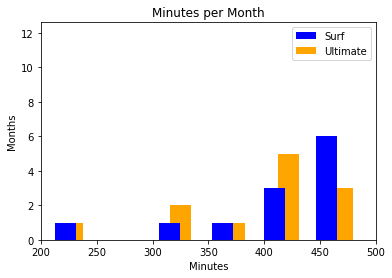

In [32]:
# Compare the number of minutes users of each plan require each month. Plot a HISTOGRAM.
ultimate_minutes = ultimate_revenue_df.groupby('month')['minutes_per_month'].mean().reset_index()
surf_minutes = surf_revenue_df.groupby('month')['minutes_per_month'].mean().reset_index()

fig, ax = plt.subplots(1, 1)

# Added axis labels
ax.set_xlabel('Minutes')
ax.set_ylabel('Months');

surf = ax.hist(surf_minutes, bins=10, label='Ultimate', color=['blue', 'orange'])
ultimate = ax.hist(ultimate_minutes, bins=10, label='Surf', color=['orange', 'blue'])

#Added a Title
plt.title('Minutes per Month')

# Added a legend
plt.legend(('Surf', 'Ultimate'), loc='upper right')
plt.xlim(xmin=200, xmax = 500)
plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Seems we need legend in graph to understand what is red bar and what is orange bar.
</div>

<div class="alert alert-block alert-info">
Why is the legend color not meeting up with the graph color? Surf is red but on the graph it's blue!
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

We can do it like this:
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job.
</div>

#### Got it. Thanks for showing me, the color is what I couldn't figure out. 

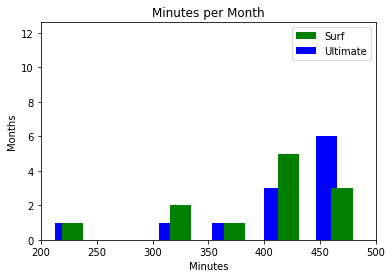

In [33]:
# reviewer's example
fig, ax = plt.subplots(1, 1)

# Added axis labels
ax.set_xlabel('Minutes')
ax.set_ylabel('Months');

ultimate = ax.hist(ultimate_minutes, bins=10, label='Ultimate', color=['green', 'blue'])
surf = ax.hist(surf_minutes, bins=10, label='Surf', color=['blue', 'green'])

#Added a Title
plt.title('Minutes per Month')

# Added a legend
plt.legend(('Surf', 'Ultimate'), loc='upper right')
plt.xlim(xmin=200, xmax = 500)
plt.show()

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Also, we can plot using df: df.plot(kind='hist', bins=100)
</div>

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [34]:
# Calculate the mean and the variance of the monthly call duration
ultimate_call_duration_variance = np.var(ultimate_revenue_df['average_duration'])
ultimate_call_duration_mean = np.mean(ultimate_revenue_df['average_duration'])

surf_call_duration_variance = np.var(surf_revenue_df['average_duration'])
surf_call_duration_mean = np.mean(surf_revenue_df['average_duration'])


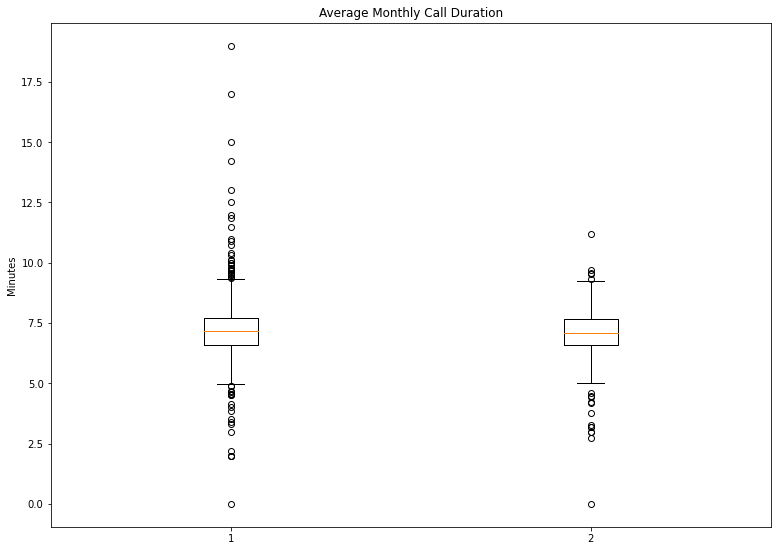

In [35]:
# Plot a boxplot to visualize the distribution of the monthly call duration
avg_ultimate = ultimate_revenue_df['average_duration']
avg_surf = surf_revenue_df['average_duration']
avg_surf = avg_surf.dropna()
avg_ultimate = avg_ultimate.dropna()
data = [avg_surf, avg_ultimate]
fig = plt.figure(figsize =(10, 7))
 
# # # Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# # # Creating plot
bp = ax.boxplot(data)
plt.title('Average Monthly Call Duration')
plt.ylabel('Minutes')
 
# # # show plot
plt.show()



#### Looking at the boxplot you can see that the median, quartiles, and extremes are extremely similar but that the first boxplot, which is the Surf Plan's average duration of minutes have a wide spectrum of outliers. This makes sense because some people enjoy having long phone calls. 

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

### Messages

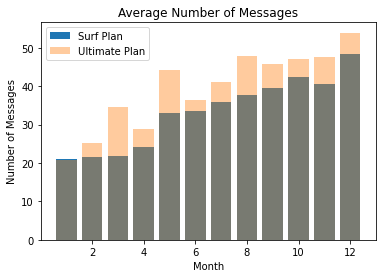

In [36]:
# Compare the number of messages users of each plan tend to send each month
num_message_surf = surf_revenue_df.groupby('month')['num_messages'].mean()
num_message_ultimate = ultimate_revenue_df.groupby('month')['num_messages'].mean()
plt.bar(range(1,13), num_message_surf)
plt.bar(range(1,13), num_message_ultimate, alpha=0.4)
plt.title('Average Number of Messages')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.legend(['Surf Plan', 'Ultimate Plan'])
plt.show()


#### Graphed the differences between the average number of messages per month between the two plans. We can see that there are some distinct differences, with the Ultimate Plan members on average sending more messages than the Surf Plan members. As a company, they could use that to advertise the greater amount of messages that could be sent depending on the two. 

In [37]:
# Calculate the mean and the variance of the monthly call duration
ultimate_message_variance = np.var(ultimate_revenue_df['num_messages'])
ultimate_message_mean = np.mean(ultimate_revenue_df['num_messages'])

surf_message_variance = np.var(surf_revenue_df['num_messages'])
surf_message_mean = np.mean(surf_revenue_df['num_messages'])


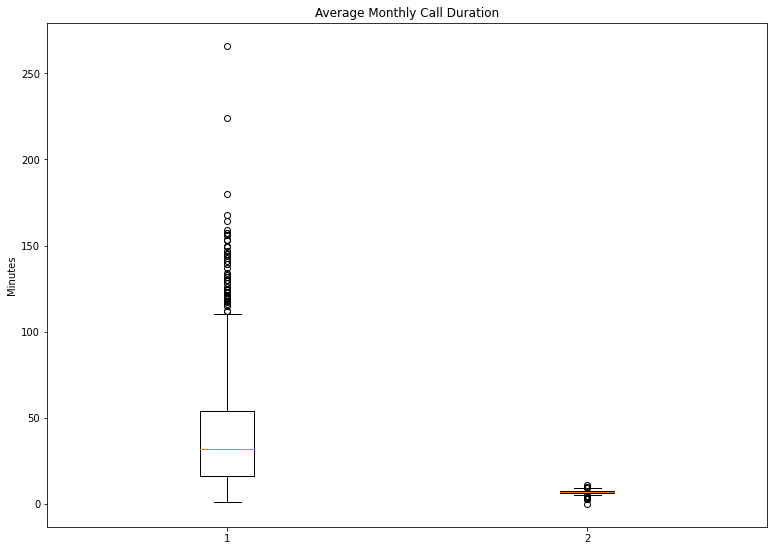

In [38]:
message_ultimate = ultimate_revenue_df['num_messages']
message_surf = surf_revenue_df['num_messages']
message_surf = message_surf.dropna()
message_ultimate = avg_ultimate.dropna()
data = [message_surf, message_ultimate]
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
plt.title('Average Monthly Call Duration')
plt.ylabel('Minutes')
 
# show plot
plt.show()

#### Looking at our boxplots we can see that the median and upper quartiles of the Ultimate Plan are higher. I think the company can use that in their advertising to persuade customers into buying the Ultimate Plan over the Surf Plan. 

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

### Internet

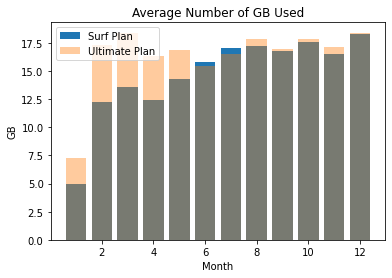

In [39]:
# Compare the amount of internet traffic consumed by users per plan
# Compare the number of messages users of each plan tend to send each month
gb_used_surf = surf_revenue_df.groupby('month')['gb_used'].mean()
gb_used_ultimate = ultimate_revenue_df.groupby('month')['gb_used'].mean()
plt.bar(range(1,13), gb_used_surf)
plt.bar(range(1,13), gb_used_ultimate, alpha=0.4)
plt.title('Average Number of GB Used')
plt.xlabel('Month')
plt.ylabel('GB')
plt.legend(['Surf Plan', 'Ultimate Plan'])
plt.show()


#### One of the first things that piques my curiousity is why February and March were so high for the Ultimate Plan. I want to ask the company questions about those two months. I also see that between the two plans there is not a high amount of variation between the amount of GB's used between the two plans, other than the two outliers of February and March. 

In [40]:
ultimate_gb_variance = np.var(ultimate_revenue_df['gb_used'])
ultimate_gb_mean = np.mean(ultimate_revenue_df['gb_used'])

surf_gb_variance = np.var(surf_revenue_df['gb_used'])
surf_gb_mean = np.mean(surf_revenue_df['gb_used'])

In [41]:
print(f"The average GB's used by a customer with the Surf Plan was {round(surf_gb_mean, 2)} GB's.")
print(f"The average GB's used by a customer with the Ultimate Plan was {round(ultimate_gb_mean, 2)} GB's.")

The average GB's used by a customer with the Surf Plan was 16.83 GB's.
The average GB's used by a customer with the Ultimate Plan was 17.33 GB's.


#### As we can see the average amount of GB's used between customers with the two plans are close to being the same. So if the company can get more customers on the Ultimate plan, they will make more money off of each customer. 

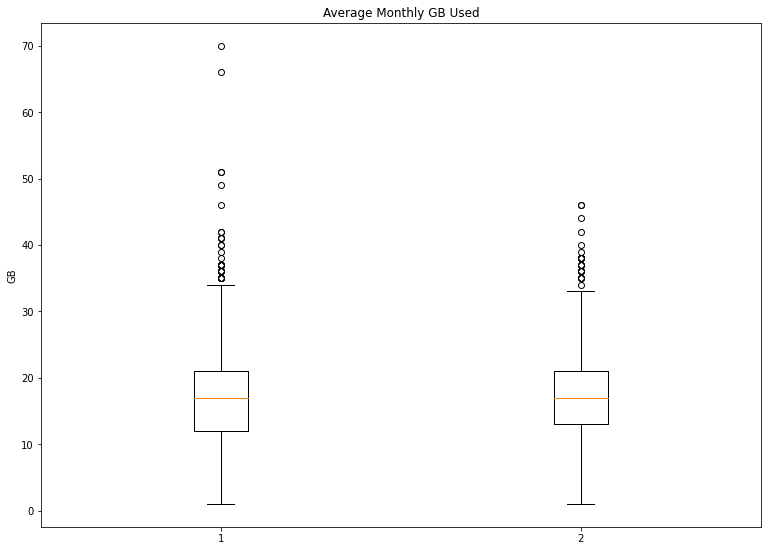

In [42]:
message_ultimate = ultimate_revenue_df['gb_used']
message_surf = surf_revenue_df['gb_used']
message_ultimate = message_ultimate.dropna()
message_surf = message_surf.dropna()
data = [message_surf, message_ultimate]
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
plt.title('Average Monthly GB Used')
plt.ylabel('GB')
 
# show plot
plt.show()

#### We can see from the boxplots that the medians and the quartiles are extremely similar between the two plans. 

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

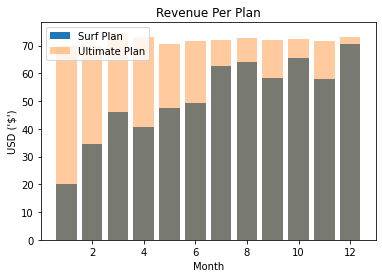

In [43]:
revenue_surf = surf_revenue_df.groupby('month')['total_revenue_surf'].mean()
revenue_ultimate = ultimate_revenue_df.groupby('month')['total_revenue_ultimate'].mean()
plt.bar(range(1,13), revenue_surf)
plt.bar(range(1,13), revenue_ultimate, alpha=0.4)
plt.title('Revenue Per Plan')
plt.xlabel('Month')
plt.ylabel("USD ('$')")
plt.legend(['Surf Plan', 'Ultimate Plan'])
plt.show()


#### We can see from our graph that the Ultimate Plan, on average, makes more money than the Ultimate Plan. The Ultimate Plan stays a lot more consistent too compared to the Surf Plan and even with the late charges still makes more money on average. Our goal as a company should be to try and get people to sign up for the Ultimate Plan to maximize revenue. 

In [44]:
ultimate_revenue_variance = np.var(ultimate_revenue_df['total_revenue_ultimate'])
ultimate_revenue_mean = np.mean(ultimate_revenue_df['total_revenue_ultimate'])

surf_revenue_variance = np.var(surf_revenue_df['total_revenue_surf'])
surf_revenue_mean = np.mean(surf_revenue_df['total_revenue_surf'])

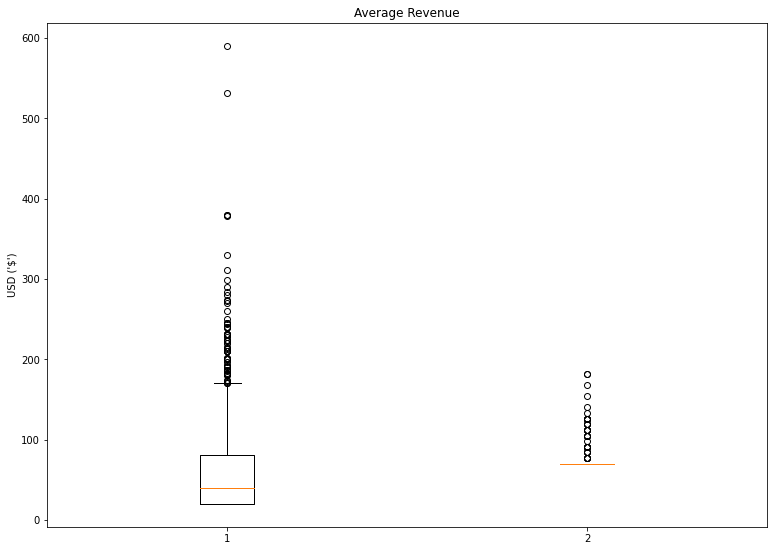

In [45]:
revenue_ultimate = ultimate_revenue_df['total_revenue_ultimate']
revenue_surf = surf_revenue_df['total_revenue_surf']
data = [revenue_surf, revenue_ultimate]
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
plt.ylim=([0,200])
plt.title('Average Revenue')
plt.ylabel("USD ('$')")

# show plot
plt.show()

[Formulate conclusions about how the revenue differs between the plans.]

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good graphs!
    
Also, we can add histograms. They are very useful here.
</div>

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [46]:
# Test the hypotheses
average_revenue_surf_plan = surf_revenue_df['total_revenue_surf']
average_revenue_ultimate_plan = ultimate_revenue_df['total_revenue_ultimate']
np.var(average_revenue_surf_plan)
np.var(average_revenue_ultimate_plan)


128.98115900003052

#### I created two different dataframes that have the total revenues from the Surf Plan and the Ultimate Plan. Then I tested the variances to make sure they weren't equal or close to equal. Finally, below I did a hypothesis test to test the null hypothesis. 

In [47]:
# Test the hypotheses
#### Null hypothesis would be "The average revenue from users of the Ultimate and Surf plans are the same."

#### Alternative Hypothesis would be "The average revenue from the Ultimate and Surf plans are different."


alpha = 0.05  # critical statistical significance

results = st.ttest_ind(average_revenue_surf_plan, average_revenue_ultimate_plan, equal_var= False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 

p-value:  1.2184115852123163e-15
We reject the null hypothesis


#### We must reject the null hypothesis that "The average revenue from users of the Ultimate and Surf plans are the same." 

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [48]:
# Test the hypotheses
#### Null hypothesis would be "The average revenue from users in the 
#### NY-NJ area is NOT different from that of the users from the other regions."

#### Alternative Hypothesis would be "The average revenue from users in the NY-NJ area is different
#### fromt that of the users from the other region."
ny_nj_surf = surf_revenue_df[surf_revenue_df['state'] == 'NY-NJ-PA MSA']
ny_nj_df_surf = ny_nj_surf[['user_id', 'month', 'total_revenue_surf']].copy()

ny_nj_ultimate = ultimate_revenue_df[ultimate_revenue_df['state'] == 'NY-NJ-PA MSA']
ny_nj_df_ultimate = ny_nj_ultimate[['user_id', 'month', 'total_revenue_ultimate']].copy()

ny_nj_dfs = [ny_nj_df_surf, ny_nj_df_ultimate]

for df in ny_nj_dfs:
    df.columns = ['user_id', 'month', 'total_revenue']

total_revenue_ny_nj = pd.concat(ny_nj_dfs).reset_index(drop=True)
revenue_ny_nj = total_revenue_ny_nj['total_revenue']


not_ny_nj_surf = surf_revenue_df[surf_revenue_df['state'] != 'NY-NJ-PA MSA']
not_ny_nj_df_surf = not_ny_nj_surf[['user_id', 'month', 'total_revenue_surf']].copy()

not_ny_nj_ultimate = ultimate_revenue_df[ultimate_revenue_df['state'] != 'NY-NJ-PA MSA']
not_ny_nj_df_ultimate = not_ny_nj_ultimate[['user_id', 'month', 'total_revenue_ultimate']].copy()

not_ny_nj_dfs = [not_ny_nj_df_surf, not_ny_nj_df_ultimate]

for df in not_ny_nj_dfs:
    df.columns = ['user_id', 'month', 'total_revenue']

total_revenue_not_ny_nj = pd.concat(not_ny_nj_dfs).reset_index(drop=True)
revenue_not_ny_nj = total_revenue_not_ny_nj['total_revenue']

np.var(revenue_ny_nj)
np.var(revenue_not_ny_nj)

alpha = 0.05  # critical statistical significance

results = st.ttest_ind(revenue_ny_nj, revenue_not_ny_nj, equal_var= False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 



p-value:  0.03870322661292938
We reject the null hypothesis


####  I put together all of the revenues fro mthe NY_NJ area and the areas that are not NY-NJ into two seperate dataframes and then did a hypothesis test on them to test the Null Hypothesis. Using the hypothesis test we must reject the null hypothesis that "The average revenue from users of the Ultimate and Surf plans are the same." 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job! Correct tests.
</div>

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

#### When I look at the data, it tells me that even though we get extra money for overcharges on the Surf Plan, ultimately, the Ultimate Plan makes the company more money in the long run. The average amount per customer that the Ultimate Plan makes is 72.65 and the Surf plan give us an average of 63.31. 

 #### Something to look at for the company is why there are more than double the amount of people that have chosen the Surf Plan over the Ultimate Plan and how the company can try to incentivize people to switch so that they can make more revenue. 

#### Based on our data our goal as a company should be to try and convert as many of our Surf Plan customers as we can to the Ultimate Plan to maximize revenue for the company. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good final conclusion!
</div>

<div class="alert alert-block alert-warning">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>

Christopher, thank you for sending your project. You've done a really good job on it! <br>
    
There are a lot of correct conclusions and nice code. <br>
    
However, there are some issues. I wrote comments. Please elaborate them.
    
You have very good analytic skills, keep up the good work! I will be waiting for your corrected project.
    
Also, do not forget to rerun project before sending.
</div>

<div class="alert alert-block alert-info">
Thanks I appreciat that compliment! It means a lot and I am working really hard to do a good job, understand the data, and get a great job after this is done. I do have some questions in the Project. I am sending this to you and will await further instructions. 
</div>

<div class="alert alert-block alert-warning">
<b>Overall reviewer's comment v2</b> <a class="tocSkip"></a>

Christopher, I really appreciate the corrections you sent in! Thanks for taking the time to do so.
    
However, join dataframes part needs a bit more work. Could you take a second glance at it?
    
If you have troubles with task you can leave comment here or ask you tutor for help =)
</div>

<div class="alert alert-block alert-info">
I agree I just wanted to get the few questions I had answered before I started working on fixing the project. Thank you!
</div>

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment v3</b> <a class="tocSkip"></a>

Your corrections look great, you've improved your work significantly!
    
I'm glad to say that your project has been accepted. Good luck on the next sprint!
</div>